<img src="images/keepcoding.png" width=200 align="left">

# Módulo de Matemáticas 101: reto del fin de semana

El reto de esta semana es implementar el algoritmo de Singular Value Decomposition para comprimir una imagen. Podéis guiaros por lo visto en las clases y os recomiendo también esta web:

https://timbaumann.info/svd-image-compression-demo/

## SVD para comprimir una imagen

El algoritmo de Singular Value Decomposition, del que ya hemos hablado en el módulo, nos puede servir para comprimir una imagen. Vamos a implementar varias funciones para esto. Como repaso, el algoritmo nos devuelve la descomposición de una matriz en tres matrices, una de ellas con los elementos principales y las otras dos con los vectores principales.

Usaremos:

- Una imagen de `scipy.datasets`
- La implementación del algoritmo en `scipy.linalg`: https://docs.scipy.org/doc/scipy-1.14.0/reference/generated/scipy.linalg.svd.html
- La librería `matplotlib`para las gráficas
- El error SSE (sum of squared estimate of errors)


Definición:

$$SSE =  \sum_{i=1}^{n}  (x_{i} -  \widehat{x}_i ) ^2 $$

Donde:

- $x_i$ son los valores de la matriz original X
- $\widehat{x}_i$ son los valores de la matriz reconstruida $\widehat{X}$

Lo primero, vemos la imagen que vamos a comprimir:

In [26]:
!pip install pooch

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


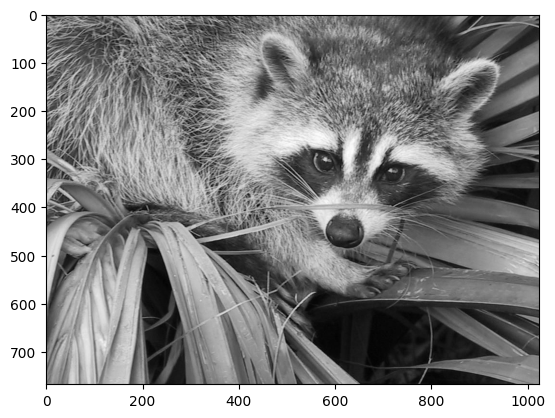

In [ ]:
import matplotlib.pyplot as plt
from scipy import datasets
%matplotlib inline

# Load image
A = datasets.face(gray=True)

plt.imshow(A, cmap=plt.cm.gray)

In [28]:
A

array([[114, 130, 145, ..., 119, 129, 137],
       [ 83, 104, 123, ..., 118, 134, 146],
       [ 68,  88, 109, ..., 119, 134, 145],
       ...,
       [ 98, 103, 116, ..., 144, 143, 143],
       [ 94, 104, 120, ..., 143, 142, 142],
       [ 94, 106, 119, ..., 142, 141, 140]], dtype=uint8)

In [29]:
type(A)

numpy.ndarray

Las siguientes funciones te ayudarán a llegar a la solución final:

### 1. Implementa la función para el SSE
La función debe tener como entrada las dos matrices y como salida un número que será el error cometido.

In [30]:
import numpy as np

def sse_score(X, X_hat):
    # TODO define el error
    return np.sum((X - X_hat) ** 2)

X = np.array([[1, 2], [3, 4]])
X_hat = np.array([[1.01, 1.75], [2.81, 3.99]])
sse = sse_score(X, X_hat)  
print(sse)

0.09879999999999997


### 2. Implementa una función para ejecutar SVD
La función debe tener como entrada una matriz y como salida las tres matrices de la descomposición.

In [31]:
import numpy as np
from scipy.linalg import svd

def svd_fun(X):
    # TODO Define la función
    U, s, Vt = svd(A, full_matrices=False)
    S = np.diag(s)
    return U, S, Vt # S es una matriz diagonal

X = np.array([[1, 2], [3, 4]])
U, S, Vt = svd_fun(X)  
print(U)
print(S)
print(Vt)

[[ 3.1780481e-02  1.8994948e-02  1.7676966e-02 ... -5.0002450e-06
  -2.2464611e-02 -5.1619443e-03]
 [ 3.1889021e-02  1.7726775e-02  1.6094161e-02 ... -4.9406081e-03
   5.7390146e-02 -7.9153239e-04]
 [ 3.2730993e-02  1.2303293e-02  1.2282163e-02 ... -9.8321065e-03
  -5.9850618e-02  3.4635314e-03]
 ...
 [ 3.0345855e-02 -3.6416501e-02  2.4997159e-03 ... -6.3146703e-02
  -6.9017038e-02  8.4815219e-02]
 [ 3.0113287e-02 -3.5544720e-02  4.8351206e-04 ...  5.3052861e-02
   7.4208446e-02 -4.0593658e-02]
 [ 3.0015035e-02 -3.4644194e-02 -8.7496272e-04 ... -2.4776278e-02
  -3.2436751e-02  3.7357616e-03]]
[[1.0320173e+05 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 2.1610234e+04 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.6063792e+04 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0876999e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.00000

### 3. Implementa una función para reconstruir la imagen

Esta función deberá reconstruir la imagen a partir de un set de matrizes (U, S, Vt) dado.

In [32]:
def reconstruction(U, S, Vt):
    # TODO Define la función
    return U @ S @ Vt
    # o bien return np.dot(U, np.dot(S, Vt))

U = np.array([[-0.40455358, -0.9145143 ],
              [-0.9145143 ,  0.40455358]])
S = np.array([[5.4649857 , 0.        ],
              [0.        , 0.36596619]])
Vt = np.array([[-0.57604844, -0.81741556],
               [ 0.81741556, -0.57604844]])
X_hat = reconstruction(U, S, Vt)
X_hat

array([[0.99999999, 1.99999998],
       [3.00000003, 4.00000001]])

En este punto, ya puedes ver cuál es el error cometido si se reconstruye la matriz inicial directamente después de aplicar SVD.

In [33]:
sse = sse_score(X, X_hat)
print(f"El error de reconstrucción es: {sse}")

El error de reconstrucción es: 1.4715305057493961e-15


### 4. Implementa la compresión

Esta es la parte más complicada. A la función le tendremos que pasar la imagen, en forma matricial, y el número de componentes que queremos usar para la compresión.

La función aplicará SVD y reconstruirá la matriz usando solo los n_comp primeros valores propios de la descomposición. 

In [34]:
### TODO: Función que recibe una imagen A y devuelve la imagen comprimida
### Tiene como entrada A y el número de componentes para realizar la reducción de dimensionalidad
### Devuelve la imagen comprimidad y el error de reconstrucción

def image_compression(A, n_comp):
    # TODO 1: Aplicar SVD (usando la función que hemos creado)
    U, S, Vt = svd_fun(A)
    
    # TODO 2: Reconstruir usando solo el número de componentes n_comp (usando la función que hemos creado)
    U_reduced = U[:, :n_comp]       # Usar solo las primeras n_comp columnas de U
    S_reduced = S[:n_comp, :n_comp] # Usar solo los primeros n_comp valores singulares
    Vt_reduced = Vt[:n_comp, :]     # Usar solo las primeras n_comp filas de Vt

    # TODO 3: Reconstruir la imagen comprimida
    A_hat = reconstruction(U_reduced, S_reduced, Vt_reduced)
    
    # TODO 4: Calcular el error
    sse = sse_score(A, A_hat)
    
    return A_hat, sse # A_hat es la matriz comprimida y sse es su error respecto de A

racoon = datasets.face(gray=True)
racoon_hat, sse = image_compression(racoon, n_comp=50)

### 5. Gráficas del resultado

Por último, se pide que pruebes para varios valores del número de componentes y grafiques la imagen original junto con varias compresiones. Puedes usar un grid 2x2 de `matplotlib`.

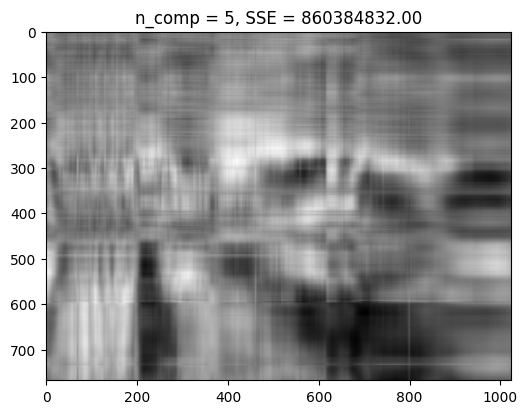

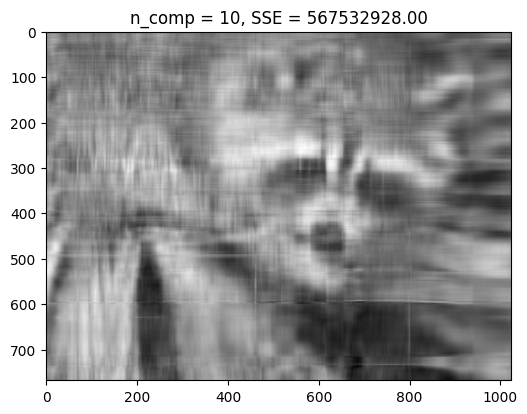

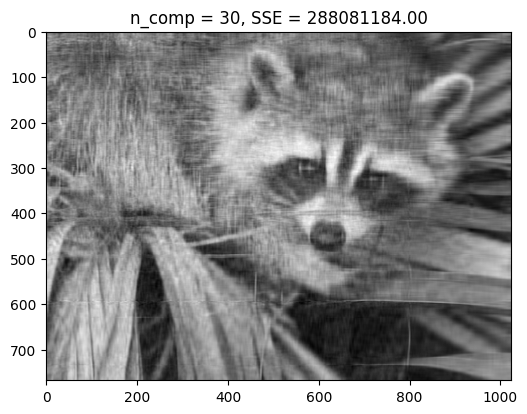

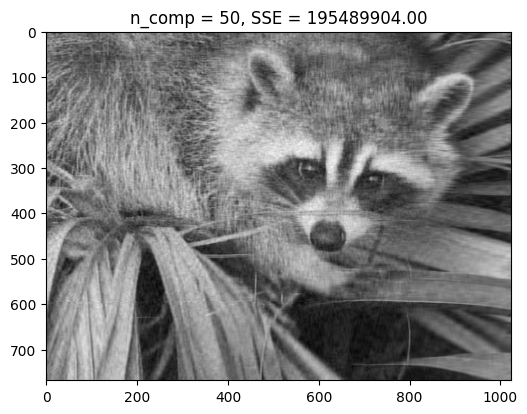

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.datasets import face  
# Asumimos que la función `image_compression` ya está definida

# Cargar una imagen de ejemplo (una cara en escala de grises)
racoon = face(gray=True)  # Ahora usamos scipy.datasets.face()

# Elegir diferentes valores para n_comp y mostrar las imágenes comprimidas
n_comps = [5, 10, 30, 50]  # Ejemplos de diferentes valores de n_comp

for n_comp in n_comps:
    # Comprimir la imagen con el número de componentes especificado
    racoon_hat, sse = image_compression(racoon, n_comp)
    
    # Crear la figura
    plt.figure(figsize=(6, 6))
    
    # Mostrar la imagen comprimida
    plt.imshow(racoon_hat, cmap=plt.cm.gray)
    
    # Añadir el título con el número de componentes y el error de reconstrucción
    plt.title(f"n_comp = {n_comp}, SSE = {sse:.2f}")
    
    # Mostrar la gráfica
    plt.show()

